In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Softmax,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


2023-05-21 16:41:36.732623: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 16:41:37.647806: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
model = Sequential([
    Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10,activation='softmax')
])

2023-05-21 16:41:39.894158: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-21 16:41:39.937029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-21 16:41:39.937317: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 16)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics = [acc,mae]
              )


In [9]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist_data.load_data()

In [10]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [11]:
train_images = train_images/255.0
test_images =  test_images/255.0

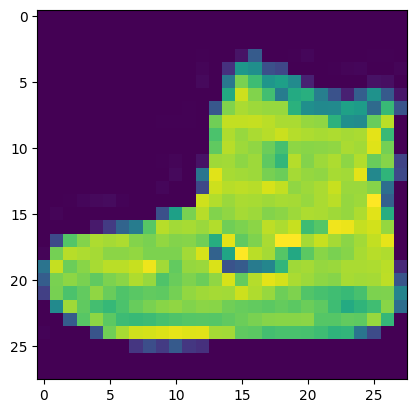

In [12]:
i = 0
img = train_images[i,:,:]
plt.imshow(img)
plt.show()

In [13]:
history = model.fit(train_images[...,np.newaxis],train_labels,epochs=8,batch_size=256,verbose=2)

Epoch 1/8


2023-05-21 16:46:32.978704: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-21 16:46:33.729794: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f7a78005c80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-21 16:46:33.729829: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2023-05-21 16:46:33.735833: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-21 16:46:33.896544: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 - 4s - loss: 0.5688 - sparse_categorical_accuracy: 0.7984 - mean_absolute_error: 4.4200 - 4s/epoch - 16ms/step
Epoch 2/8
235/235 - 1s - loss: 0.3878 - sparse_categorical_accuracy: 0.8640 - mean_absolute_error: 4.4200 - 989ms/epoch - 4ms/step
Epoch 3/8
235/235 - 1s - loss: 0.3501 - sparse_categorical_accuracy: 0.8754 - mean_absolute_error: 4.4200 - 981ms/epoch - 4ms/step
Epoch 4/8
235/235 - 1s - loss: 0.3281 - sparse_categorical_accuracy: 0.8838 - mean_absolute_error: 4.4200 - 947ms/epoch - 4ms/step
Epoch 5/8
235/235 - 1s - loss: 0.3139 - sparse_categorical_accuracy: 0.8892 - mean_absolute_error: 4.4200 - 935ms/epoch - 4ms/step
Epoch 6/8
235/235 - 1s - loss: 0.3002 - sparse_categorical_accuracy: 0.8938 - mean_absolute_error: 4.4200 - 949ms/epoch - 4ms/step
Epoch 7/8
235/235 - 1s - loss: 0.2956 - sparse_categorical_accuracy: 0.8941 - mean_absolute_error: 4.4200 - 991ms/epoch - 4ms/step
Epoch 8/8
235/235 - 1s - loss: 0.2875 - sparse_categorical_accuracy: 0.8974 - mean_absolute_err

In [14]:
df = pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

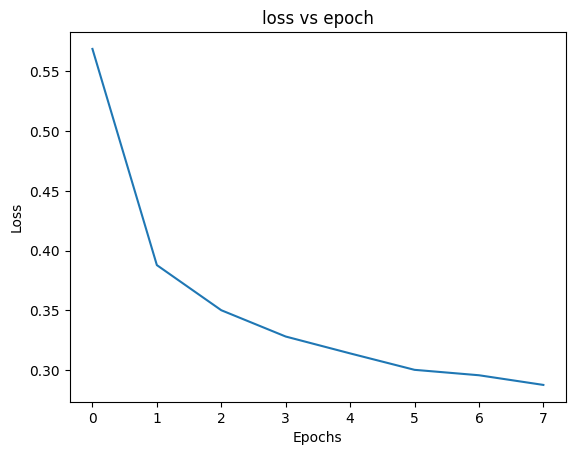

In [15]:
loss_plot = df.plot(y="loss",title = "loss vs epoch",legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")

In [18]:
test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis],test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3204 - sparse_categorical_accuracy: 0.8860 - mean_absolute_error: 4.4200


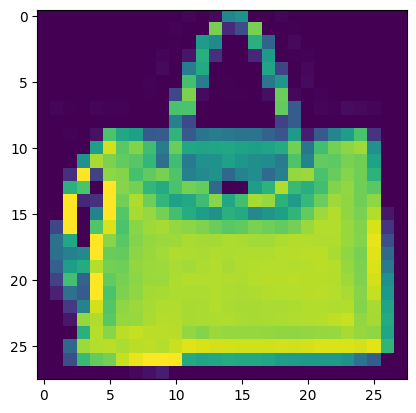

Label : Bag


In [19]:
random_int = np.random.choice(test_images.shape[0])
test_image_chosen = test_images[random_int]
plt.imshow(test_image_chosen)
plt.show()
print(f'Label : {labels[test_labels[random_int]]}')

In [29]:
test_image_chosen.shape
prediction =  labels[np.argmax(model.predict(test_image_chosen[np.newaxis,...,np.newaxis]))]
print(prediction)


1/1 [==============================] - 0s 21ms/step
Bag


: 

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from IPython import embed

mnist_dataset = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)  = mnist_dataset.load_data()

train_images_scale = train_images/255.0
train_images_scale = train_images_scale[...,np.newaxis]
test_images_scale = test_images/255.0
test_images_scale =  test_images_scale[...,np.newaxis]


def model_return(input_shape):
    model = Sequential([
        Conv2D(8,(3,3),activation='relu',padding='SAME',input_shape=input_shape),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(64,activation='relu'),
        Dense(64,activation='relu'),
        Dense(10,activation='softmax')
    ])
    return model

def model_compile(model):
    opt = tf.keras.optimizers.Adam()
    loss = 'sparse_categorical_crossentropy'
    acc = tf.keras.metrics.SparseCategoricalAccuracy()
    model.compile(optimizer=opt,loss=loss,metrics=[acc])


def train_model(model,train_images,train_label):
    history = model.fit(train_images,train_label,epochs=5)
    return history


model = model_return(train_images_scale[0].shape)
model_compile(model)
history = train_model(model,train_images_scale,train_labels)

2023-05-21 17:44:47.045819: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-21 17:44:47.943206: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-05-21 17:44:49.650096: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-21 17:44:49.687004: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA n

Epoch 1/5


2023-05-21 17:44:52.321130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-05-21 17:44:52.986861: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f47baf42120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-21 17:44:52.986888: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2023-05-21 17:44:52.991392: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-21 17:44:53.129263: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1875/1875 [==============================] - 9s 3ms/step - loss: 0.2383 - sparse_categorical_accuracy: 0.9280
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0767 - sparse_categorical_accuracy: 0.9765
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0551 - sparse_categorical_accuracy: 0.9829
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0420 - sparse_categorical_accuracy: 0.9862
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0319 - sparse_categorical_accuracy: 0.9898


In [9]:
df = pd.DataFrame(history.history)
plot_acc = df.plot(y="sparse_categorical_accuracy",title="acccuracy vs epoch",legend=False)
plot_acc.set(xlabel="epoch",ylabel="accuracy")
plt.show()

KeyError: 'accuracy'